In [21]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import rankdata

In [17]:
data = pd.read_csv("../data/Train_call.txt", sep='\t')
y = pd.read_csv("../data/Train_clinical.txt", sep='\t')

regions = data.drop(['Chromosome','Start','End','Nclone'], axis=1)
regions.head()

,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,Array.49,Array.16,Array.146,Array.143,...,Array.64,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0
4,0,0,0,0,0,0,0,-1,0,0,...,0,1,1,0,1,0,0,0,-1,0


In [19]:
regions_ranks_average = rankdata(regions,method='average',axis = 1)
regions_ranks_dense = rankdata(regions,method='dense',axis = 1)


In [20]:
mapper_average = umap.UMAP(metric='correlation').fit(regions_ranks_average)

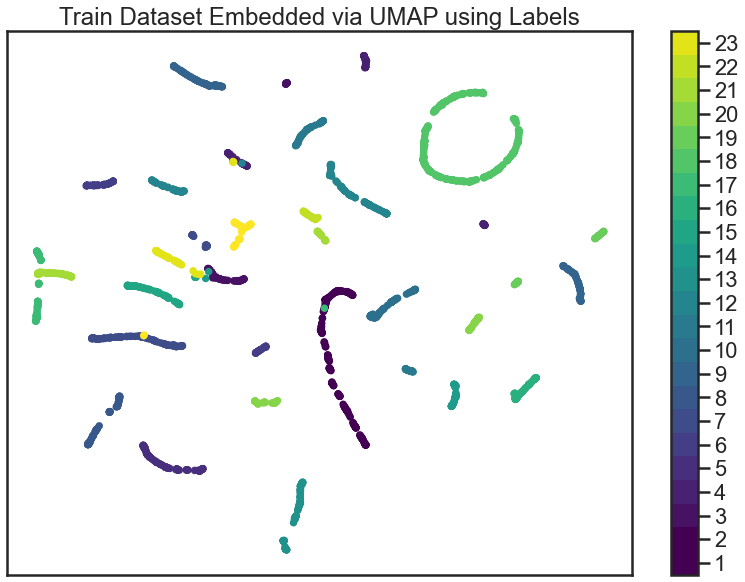

In [40]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mapper_average.embedding_.T, s=30, c=data['Chromosome'], cmap='viridis', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(24)-0.5)
cbar.set_ticks(np.arange(23))
cbar.set_ticklabels(data['Chromosome'].unique())
plt.title('Region embeddings using spearman correlation with UMAP');

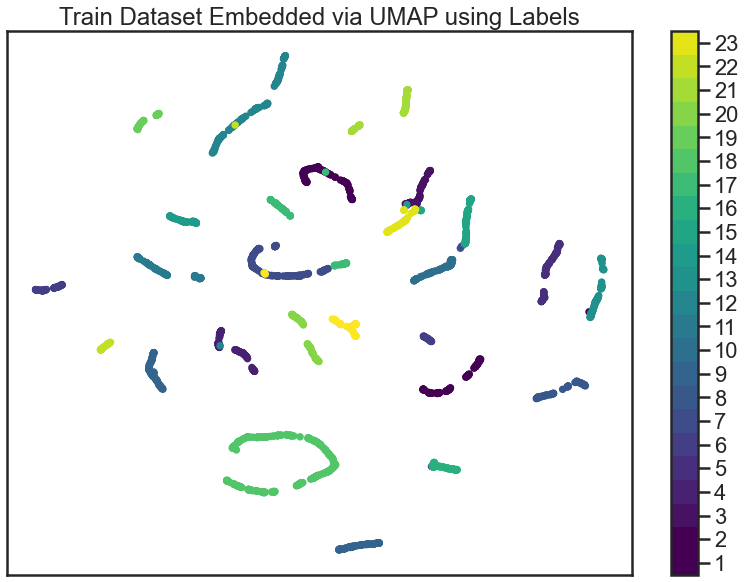

In [42]:
mapper_dense = umap.UMAP(metric='correlation').fit(regions_ranks_dense)

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mapper_dense.embedding_.T, s=30, c=data['Chromosome'], cmap='viridis', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(24)-0.5)
cbar.set_ticks(np.arange(23))
cbar.set_ticklabels(data['Chromosome'].unique())
plt.title('Region embeddings using spearman correlation with UMAP');
